# Functions That we use frequently

importing libraries we are going to need :

In [149]:
import imageio as iio
import numpy as np
import matplotlib.pyplot as plt

### Image Reading

In [150]:
im=iio.imread('cat_grayscale.jpg',as_gray=True)
print(im.shape)

(500, 750)


/tmp/ipykernel_5345/1830399834.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im=iio.imread('cat_grayscale.jpg',as_gray=True)


### Image Display

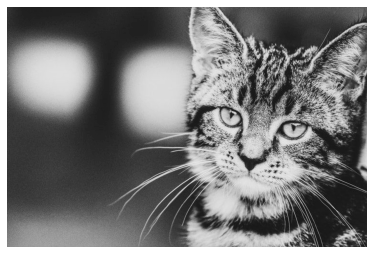

In [139]:
def make_image(data, size=(5, 5), dpi=100):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('gray')
    ax.imshow(data, aspect='equal')
make_image(im)

### Rectangular mask creating function

In [152]:
def mask(im, x1, x2 , y1 , y2):
    shape= im.shape
    new = np.ones((shape[0],shape[1]), dtype=int)
    for i in range(x1,x2):
        for j in range(y1,y2):
            new[i,j]=0
    return new

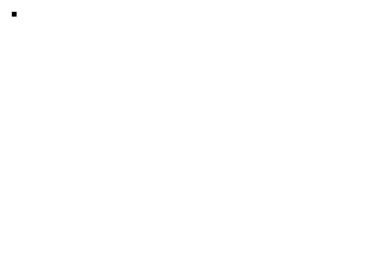

In [153]:
make_image(mask(im, 10, 20 , 10 , 20))

In [154]:
def delete_zone(im,mask):
    return im*mask

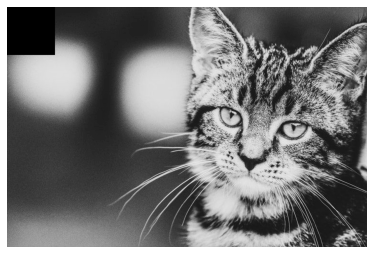

In [156]:
make_image(delete_zone(im,mask(im, 0, 100 , 0 , 100)))

# Let's calculate the priority term

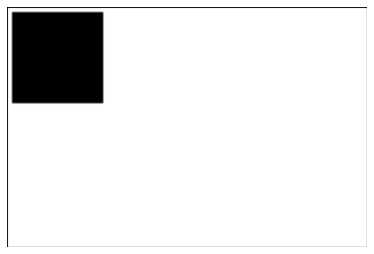

In [159]:
# Let's calculate the priority term : 

## C(p) the confidence term :

## First lets define a function that would allow us to get patches
def get_patch(image,p,patch_size=4):
    r=int(patch_size/2)
    clip = image[p[0]-r:p[0]+r, p[1]-r:p[1]+r]
    return clip    

def patch_norm(p):
    return sum([sum([abs(p[i,j]) for i in range(p.shape[0])]) for j in range(p.shape[1])])


######## Confidence term
def c_matrix(mask):
    i = mask
    n,m= mask.shape
    c=np.zeros(mask.shape)
    for k in range(0,n):
        for l in range(0,m):
            patch = get_patch(i,(k,l))
            c[k,l]=np.sum(patch)
    return c/(patch.shape[0]*patch.shape[1])

make_image(c_matrix(mask(im, 10, 200 , 10, 200)))

In [161]:
#Bords du mask rectangulaire
# We need to find out how to do it in general case 
def frontiere_rect(mask):
    n,m=mask.shape
    x1=0
    x2=0
    y1=0
    y1=0
    i=0
    j=0
    while(mask[i][j]==1):
        i+=1
        if (i==n):
            i=0
            j+=1       
    x1=i
    y1=j
    while(mask[i][j]==0):
        i+=1
        if (i==n):
            x2=i
            j+=1
        if(j==m):
            y2=j-1
        if (mask[i][j]==1):
            x2=i
            i=x1
            j+=1
            y2=j
            
    frt = np.zeros((n,m))
    for i in range(x1,x2+1):
        frt[i,y1]=1
        frt[i,y2]=1
    for j in range(y1,y2+1):
        frt[x1,j]=1
        frt[x2,j]=1
    return frt

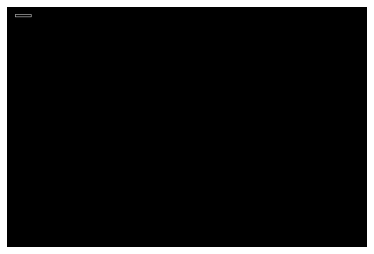

In [163]:
make_image(frontiere_rect(mask(im, 15, 20 , 17, 50)))

In [147]:
def gradient_I(image , mask):

        h, w = image.shape[:2]
        # We fill the mask points with nones
        image[mask == 1] = None
        
        # We compute the gradient 
        gradient = np.nan_to_num(np.array(np.gradient(image)))
        norme = np.sqrt(gradient[0]**2 + gradient[1]**2)
        
        fgradx,fgrady = np.zeros([h, w]),np.zeros([h, w])
        
        frontiere = np.argwhere( frontiere_rect(mask) == 1)
        
        for point in frontiere:
            patch = get_patch(image,point)
            patch_gradx = get_patch(gradient[0], point)
            patch_grady = get_patch(gradient[1], point)
            patch_norm = get_patch(norme, point)
            
            max_patch = np.unravel_index(
                patch_norm.argmax(),
                patch_norm.shape
            )
            fgradx[point[0], point[1]] = patch_gradx[max_patch]
            fgrady[point[0], point[1]] = patch_grady[max_patch]

        return gradx,grady

In [173]:
def normal(mask):
        
        return normal

In [174]:
#normal(mask(im, 15, 20 , 17, 50))